# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
plt.style.use('ggplot')
sns.set_palette('husl')

In [5]:
# Load the dataset from local file
df = pd.read_csv('datasets/athlete_events.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (271116, 15)

First few rows:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
# Filter data for 2016 medal winners
df_2016 = df[(df['Year'] == 2016) & (df['Medal'].notna())]

# Find top 5 sports by medal count
top_sports = df_2016['Sport'].value_counts().head(5).index.tolist()
print("Top 5 sports in 2016:", top_sports)

# Filter data for top 5 sports
df_top_sports = df_2016[df_2016['Sport'].isin(top_sports)]

Top 5 sports in 2016: ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']


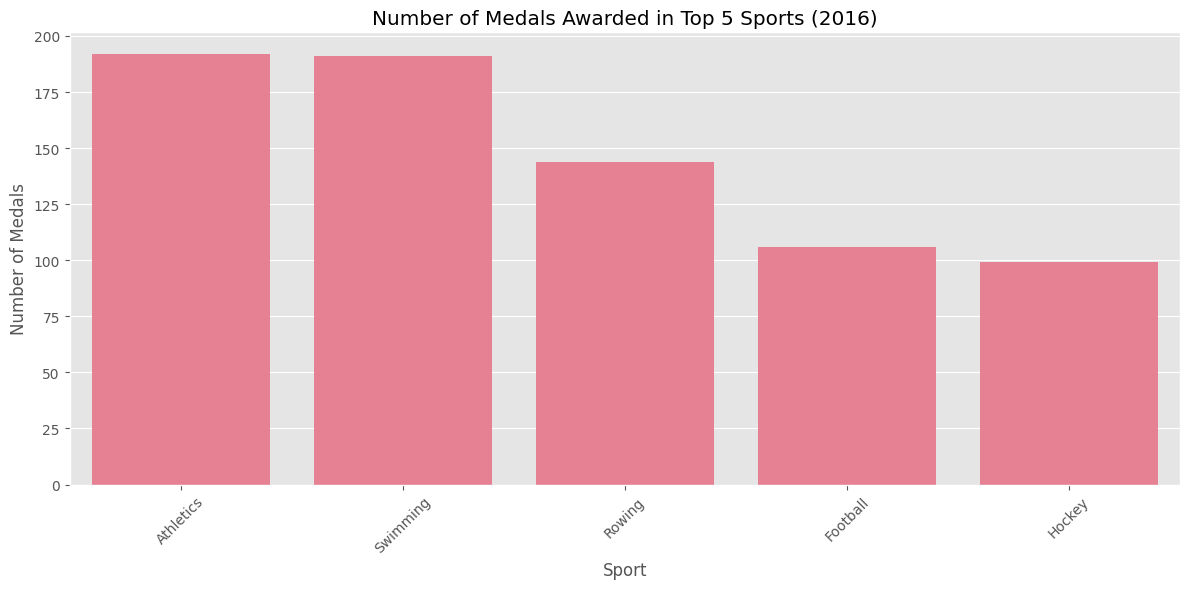

In [7]:
# 1. Plot number of medals per sport
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_sports, x='Sport', order=top_sports)
plt.title('Number of Medals Awarded in Top 5 Sports (2016)')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

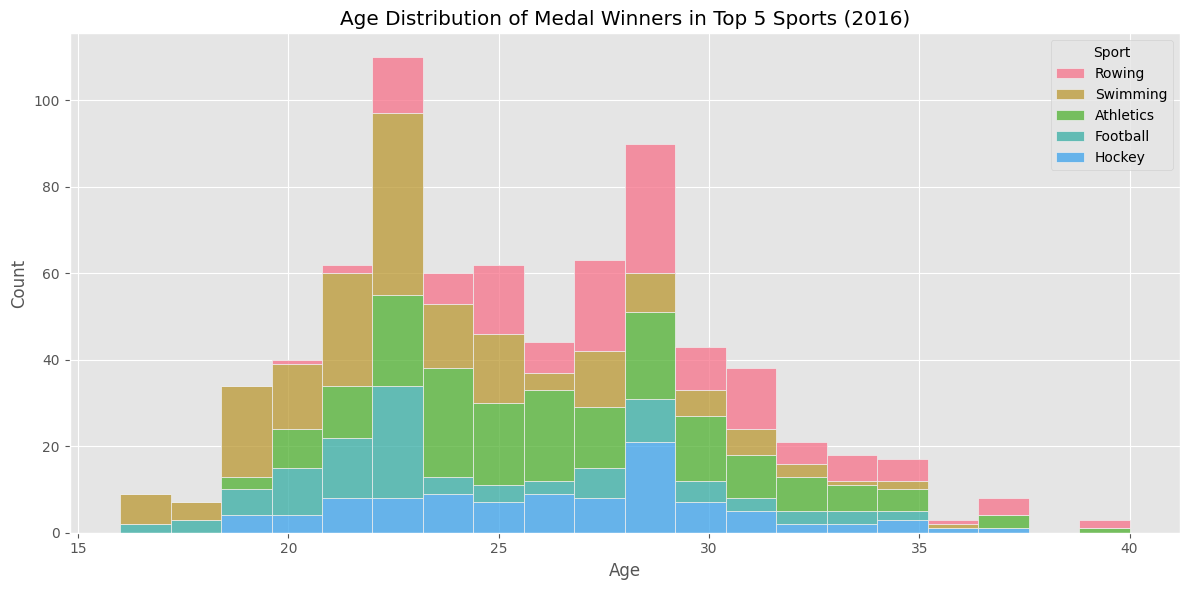

In [8]:
# 2. Plot age distribution of medal winners
plt.figure(figsize=(12, 6))
sns.histplot(data=df_top_sports, x='Age', hue='Sport', multiple='stack', bins=20)
plt.title('Age Distribution of Medal Winners in Top 5 Sports (2016)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

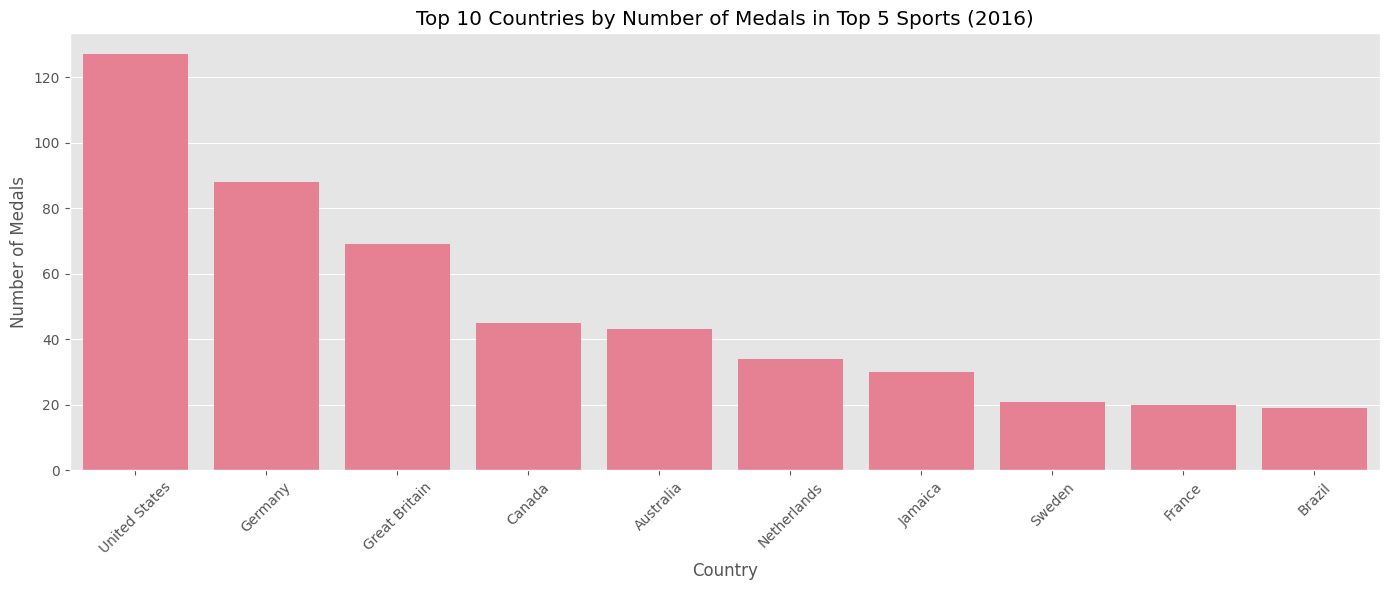

In [9]:
# 3. Plot medals by country
plt.figure(figsize=(14, 6))
country_medals = df_top_sports['Team'].value_counts().head(10)
sns.barplot(x=country_medals.index, y=country_medals.values)
plt.title('Top 10 Countries by Number of Medals in Top 5 Sports (2016)')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

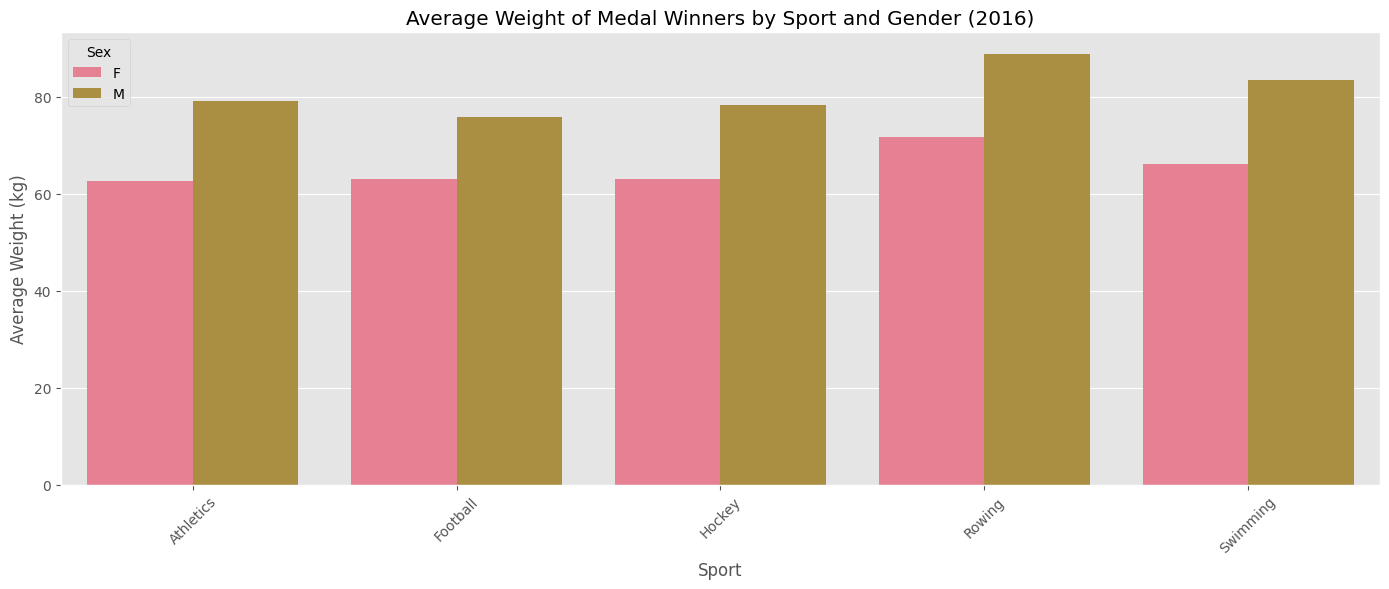

In [10]:
# 4. Plot average weight by gender and sport
plt.figure(figsize=(14, 6))
weight_data = df_top_sports.groupby(['Sport', 'Sex'])['Weight'].mean().reset_index()
sns.barplot(data=weight_data, x='Sport', y='Weight', hue='Sex')
plt.title('Average Weight of Medal Winners by Sport and Gender (2016)')
plt.xlabel('Sport')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()